### Kinetics model based upon Table 3 of doi: 10.1134/S0965544115070063

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
def lower_olefins_on_sapo_4(t,x)->list[float]:
    """System of rate equations for conversion of lower olefins to propene on SAPO-4 catalyst.
    Kinetics model based upon Table 3 of [paper](https://doi.org/10.1134/S0965544115070063)."""

    # Step 1: Specify state vector
    c2h4, c3h6, c4h8, c5h10, cx, c2h6, c3h8, c4h10 = x

    ## Step 2: Specify all rate equations
    # r1 - r4 produce CX+ ("cx+")
    r1 = 0.21 * (c2h4 ** 2) + 0.81 * c2h4 * (c3h6 + c4h8)
    r2 = 3.1 * c3h6 ** 2 + 2.3 * c3h6 * c4h8
    r3 = 33 * c4h8
    r4 = 8.6 * c5h10

    # r5 - r8 are reverse reactions of r1 - r4
    r5 = 2.8 * cx
    r6 = 32 * cx
    r7 = 21 * cx
    r8 = 4.9 * cx
    r9 = 0.042 * cx

    # r10 - r12 produce the products c2h6, c3h8, c4h10
    r10 = 0.0075 * c2h4 * c2h6
    r11 = 0.27 * c3h6 * c3h8
    r12 = 0.079 * c4h8 * c4h10

    # Step 3: Describe changes in species concentrations in terms of rate equations defined in Step 2.
    dc2h4_dt = r5 -(r1 + r10)  # Net change of c2h4
    dc3h6_dt = r6 -(r2 + r11)  # Net change of c3h6
    dc4h8_dt = r7 -(r3 + r12)  # Net change of c4h8
    dc5h10_dt = -r4            # Net change of c5h10
    dcx_dt = r1 + r2 + r3 + r4 - (r5 + r6 + r7 + r8 + r9)    # Net change of "cx+" species
    dc2h6_dt = r10  # Net change of c2h6
    dc3h8_dt = r11  # Net change of c3h8
    dc4h10_dt = r12 # Net change of c4h10

    return [dc2h4_dt,dc3h6_dt,dc4h8_dt,dc5h10_dt,dcx_dt,dc2h6_dt,dc3h8_dt,dc4h10_dt]

In [3]:
# Initialise with reactants at 1 mol/m3 & products at 0 mol/m3
# Unit Set: kg-m-mol-s
t = np.linspace(0,5,100)

## INITIALIZE SOLUTION
species = {
    "c2h4":np.ones(len(t)),
    "c3h6":np.zeros(len(t)),
    "c4h8":np.ones(len(t)),
    "c5h10":np.ones(len(t)),
    "cx":np.zeros(len(t)),
    "c2h6":np.zeros(len(t)),
    "c3h8":np.zeros(len(t)),
    "c4h10":np.zeros(len(t))
    }

# Initial State vector
y_0 = [species.get(i)[0] for i in species.keys()]

# ## INTRODUCE PERTURBATIONS IN SOME SPECIES

# # Changing c2h4 species to 4 at 50th time-point
species.get("c2h4")[50] = 4

# # Changing c4h8 species to 3 at 70th time-point
species.get("c4h8")[70] = 3 

# # Changing c3h6 species to 2 at 30th time-point
species.get("c3h6")[30] = 2

In [4]:
## ACTUAL SOLUTION LOOP

# Loop through each time-step
for i in range(len(t)-1):
    # Simulate
    ts = [t[i],t[i+1]]
    
    # y is a vector/list of size 3
    y = solve_ivp(
        fun=lower_olefins_on_sapo_4,
        y0=y_0,
        t_span=ts,
        dense_output=True
        )
    # print(len(y.y))
    # Store results to initialise the next time-step
    
    if i != 49: species.get("c2h4")[i+1] = y.y[0][-1]
    if i != 29: species.get("c3h6")[i+1] = y.y[1][-1]
    if i != 69: species.get("c4h8")[i+1] = y.y[2][-1]
    species.get("c5h10")[i+1] = y.y[3][-1]
    species.get("cx")[i+1] = y.y[4][-1]
    species.get("c2h6")[i+1] = y.y[5][-1]
    species.get("c3h8")[i+1] = y.y[6][-1]
    species.get("c4h10")[i+1] = y.y[7][-1]

    # Adjust initial condition for next loop
    y_0 = [species.get(j)[i+1] for j in species.keys()]

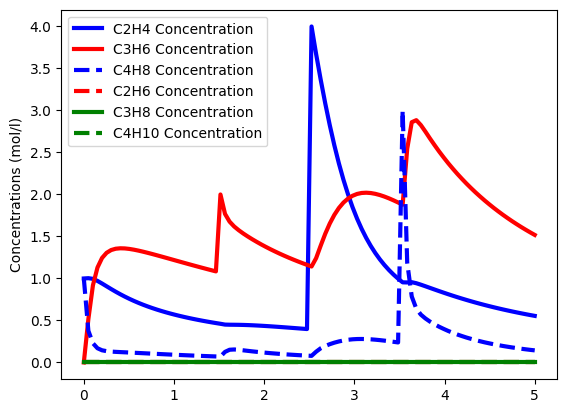

In [5]:
# Plotting all species
fig, ax = plt.subplots()
plt.plot(t,species.get("c2h4"),'b-',linewidth=3)
plt.plot(t,species.get("c3h6"),'r-',linewidth=3)
plt.plot(t,species.get("c4h8"),'b--',linewidth=3)
plt.plot(t,species.get("c2h6"),'r--',linewidth=3)
plt.plot(t,species.get("c3h8"),'g-',linewidth=3)
plt.plot(t,species.get("c4h10"),'g--',linewidth=3)
plt.ylabel("Concentrations (mol/l)")
plt.legend(['C2H4 Concentration','C3H6 Concentration','C4H8 Concentration',
            'C2H6 Concentration','C3H8 Concentration','C4H10 Concentration'],loc='best')

In [6]:
fig.savefig("SAPO-4 Kinetics.jpg",dpi = 300)